In [2]:
import os
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import join
from astropy.table import Column
import seaborn as sns

In [3]:
os.chdir(r'../Data')

Reading the Mophological and kinematical table

In [4]:
mk = Table.read('Q-ref.csv', format = 'ascii')
# mk = Table.read('Q_Recal-L0025N0752.csv', format = 'ascii')
mk

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
3226889,0.3736355400025354,0.053234520237536054,0.12762756569297418,0.2581218583511655,0.17711417162906362,0.0359092699554268,0.07426425178269415,0.731467244468864,3226889,30,3746210.5,47137317000.0,501801824.0,836548800.0,38.6588,0.055242997,3414,312751.16,3.3191096e-11,135158227000.0,132269515000.0,2034051580.0,850906240.0,3746210.5
5692534,0.3794680042597731,0.5923038422910913,0.15610793754870333,0.5994417898268398,0.43611017551809483,0.5020079041591864,1.1094982352667728,0.6340122442633017,5692534,30,1817607.5,11847346200.0,3186315520.0,402029440.0,28.180422,0.16878024,16957,152797.53,1.1860476e-08,29440280600.0,23684997100.0,5344727000.0,408738368.0,1817607.5
5728920,0.16199965543987083,0.2052219432748401,0.20027541288396222,0.2331522907290403,0.25826545182858085,0.14815552853321978,0.26710337487469393,0.2591651906077923,5728920,30,3630739.8,39546094000.0,86007336.0,954341060.0,42.532383,0.03533982,17211,444080.88,1.4673017e-06,56552276000.0,55504142000.0,86007336.0,958500740.0,3630739.8
10341428,0.22522403443200856,0.20635552541214863,0.13167903604289888,0.2769320448517646,0.2583036216935493,0.10033628913315595,0.24901868995134674,0.03835321337897442,10341428,30,7235433.0,88699978000.0,5952936400.0,3666815740.0,57.195385,0.5762099,2177,1307260.1,0.00045662734,660009320000.0,630488240000.0,25563289600.0,3946914050.0,10851339.0
12566238,0.39665930847987885,0.20231774499123112,0.3824629714473129,0.27186338506935526,0.37057332768210016,0.08536075303010761,0.20290823324391466,0.513724204940099,12566238,30,3615906.0,49454432000.0,207088736.0,813815230.0,47.149002,0.04838007,5300,346079.7,2.3803817e-05,179146932000.0,175577301000.0,2718052100.0,847986430.0,3615906.0
12569982,0.28957023910450475,0.07570525759439017,0.1266082892155065,0.29978039579093707,0.17969222509478536,0.051459490412017334,0.08959003605834988,0.5920203874224141,12569982,30,5574286.0,56434860000.0,314128288.0,546877820.0,39.297363,0.019524526,5311,471089.9,6.538812e-08,180827668000.0,177884692000.0,2371427580.0,565968960.0,5574286.0
12574144,0.2919201561617659,0.491544657813621,0.44694888301122293,0.5635520302420358,0.45334905326890007,0.400614675196549,0.7723461995507785,0.2122303023083452,12574144,30,3616160.5,73711436000.0,582484930.0,2220375810.0,51.5068,0.17847331,5323,765086.1,8.4485544e-07,253882925000.0,247679336000.0,3914793730.0,2283316740.0,5489157.5
12606457,0.3074881813724145,0.0709485417110457,-0.12707574753903073,0.2799876271616091,0.17633480222434897,0.033857167575799874,0.09930474211793842,0.06920872640459172,12606457,30,7245858.5,72771019000.0,622325310.0,2139672580.0,45.1679,0.0764098,5407,854483.75,2.1839597e-08,243127550000.0,236879086000.0,4078521340.0,2162742020.0,7245858.5
12609333,0.3580841248060661,0.09512776790262889,0.04490844649078729,0.1854569078842485,0.17561924751786076,0.07544455318729065,0.12800097449976852,0.7294852707782951,12609333,30,1876768.1,50598445000.0,352582656.0,909681540.0,36.18689,0.096991055,5414,162968.58,3.2437117e-07,150647734000.0,147345310000.0,2376025600.0,924526720.0,1876768.1


Reading table of luminosities

In [5]:
lu = Table.read('total_luminosities_RECA.csv', format ='ascii')
lu

GalID,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57
float64,str6,float64,float64,float64,float64,float64,float64
11.0,Ref100,8.450187634229371,7.5256145616261705,7.332794018805233,6.499519055846627,6.394487963631868,5.817649210359375
6.0,Ref100,8.408184353712917,7.495340931392728,7.241338972536405,6.276553499541244,6.476954508915274,5.904120415425211
1.0,Ref100,8.881598281842457,7.998023008500145,7.742776555174997,6.699711844674182,6.9741835146126645,6.4130227940866025
4.0,Ref100,8.486389498348917,7.561499721498752,7.433742679825663,6.794526202400308,6.641563529971638,6.073023254238537
7165.0,Ref100,6.421892735076585,4.922430483063327,4.656849446909889,5.101645019101053,4.275201794723876,3.6662452767939766
4218.0,Ref100,6.9097527679986435,5.473485157441624,5.225584894137033,4.765516417527379,4.484329531191637,3.869753068480367
114.0,Ref100,7.3128993695140405,6.323854837410285,6.036992571343002,5.708932711355773,5.5350868370202475,4.963773671365811
16957.0,Ref100,6.786234163739494,4.756247658161439,4.539601741354448,5.20198438642167,3.810400935813723,3.2035042303316033
2754.0,Ref100,6.3732296390686765,4.677054129434367,4.449722018638346,4.719672450159394,3.9308498048343625,3.3184905898341914


Changing the luminosities table to a data frame and removing the data from simulation Ref-L0100N1504. Disregarding data from star mass below 1E9. And calculating the limits to define groups of low, medium and high mass. 

In [6]:
dfl = lu.to_pandas()
indexNames = dfl[ dfl['Sim'] == 'Recal' ].index
dfl.drop(indexNames , inplace=True)
dfm = mk.to_pandas()
dfm=dfm.drop(dfm[dfm['Mass_Star']<1E9].index)
dfm['logMStar']=np.log10(dfm['Mass_Star'])
print(dfm['logMStar'].min())
print(dfm['logMStar'].max())
print(dfm['logMStar'].min()+(dfm['logMStar'].max()-dfm['logMStar'].min())/3)
print(dfm['logMStar'].min()+2*(dfm['logMStar'].max()-dfm['logMStar'].min())/3)
print(dfm['logMStar'].min()+3*(dfm['logMStar'].max()-dfm['logMStar'].min())/3)

print(np.percentile(dfm['logMStar'],33), np.percentile(dfm['logMStar'],66))

9.00073191609314
11.651833650344704
9.884432494176995
10.768133072260849
11.651833650344704
9.367971743838858 9.88722593897729


Changing back to a astropy' table

In [7]:
lu = Table.from_pandas(dfl)
mk = Table.from_pandas(dfm)

Joining the two tables 

In [8]:
mk_lu = join(mk,lu,keys='GalID')
mk_lu

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro,logMStar,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,float64,float64,float64,float64
21109760,0.2892753387083581,0.01310135781603905,0.2691530802645459,0.47611764490627795,0.1758689272506667,0.005944502800483662,0.010932580574129465,0.9445977410582864,21109760,30,4415859700.0,1483264490000.0,32754356200.0,419670131000.0,301.17545,3.514611,1.0,5192513500.0,0.0003212338,212385529000000.0,179181992000000.0,31954833500000.0,1235139560000.0,13545626600.0,11.622908060458828,Ref100,8.881598281842457,7.998023008500145,7.742776555174997,6.699711844674182,6.9741835146126645,6.4130227940866025
21379521,0.4670360098203262,0.013861639497244838,-0.15781894792666762,0.5843938016118366,0.1623135566375735,0.005165512306726666,0.010969365124098338,0.8448796679260223,21379521,30,10871972.0,1214449980000.0,29204351000.0,353366671000.0,309.48383,6.0781746,2.0,1670997500.0,3.094568e-07,449793436000000.0,377827266000000.0,70041907000000.0,1905425250000.0,18822572000.0,11.548225585115915,Ref100,8.700846335791727,7.822050175262917,7.565280840510923,6.5228917581151755,6.88957319239785,6.322044008183843
21573586,0.4620505767030071,0.05696273796215212,0.25160837157211813,0.5049790507873873,0.19519494394761505,0.014628751570454446,0.05102430523982849,0.9692825491534175,21573586,30,2011366780.0,759558440000.0,12756882400.0,289014579000.0,278.738,0.85262173,3.0,2733858300.0,0.0007321713,311128471000000.0,263063542000000.0,46387450000000.0,1665041560000.0,12437305300.0,11.460919750782688,Ref100,8.102660710332865,7.176698080884154,7.007512632714062,6.229489886365597,6.256268132523485,5.685925905750241
21730535,0.394156678933703,0.006600314137091612,0.33585909363576016,0.5774414722153304,0.17269760342073615,0.003522500902087179,0.005503755137211018,0.9051700043060035,21730535,30,7244372.5,1122822000000.0,21508462600.0,448573538000.0,282.0453,2.198527,4.0,1010320510.0,7.255283e-09,298877412000000.0,252773287000000.0,44226205000000.0,1865953970000.0,11993590800.0,11.651833650344704,Ref100,8.486389498348917,7.561499721498752,7.433742679825663,6.794526202400308,6.641563529971638,6.073023254238537
21924775,0.1618023952725801,0.18724176911886004,-0.0014519595480431136,0.26896978280751493,0.20272410155462534,0.06784472075216384,0.21542909659049528,0.48715747217571614,21924775,30,956294400.0,683297140000.0,9872827400.0,201371533000.0,211.56238,1.3632219,5.0,1392765700.0,4.217756e-06,201850645000000.0,171105071000000.0,29936396000000.0,802657270000.0,6524839900.0,11.303998076273057,Ref100,8.19504314972121,7.3016122937564445,7.099085225376126,6.204137256035438,6.452755259032283,5.886289757790013
21986361,0.32487531582384477,0.037843856193816916,0.15023888625935533,0.5152156677956063,0.16989659005723062,0.005721020474932512,0.036402096434782746,0.8400385701013658,21986361,30,2009535620.0,1073910580000.0,19819280400.0,372940472000.0,348.57043,0.8519436,6.0,2901399550.0,0.010208744,203058202000000.0,172676191000000.0,29079743000000.0,1291892690000.0,10382144500.0,11.571639516138218,Ref100,8.408184353712917,7.495340931392728,7.241338972536405,6.276553499541244,6.476954508915274,5.904120415425211
19634929,0.2805217631786302,0.06904888477022408,0.13172022962123142,0.5672938441362179,0.18902099665321057,0.024169419876631317,0.07645063930680478,0.3861197669686349,19634929,30,331938016.0,855587820000.0,22886287400.0,328192950000.0,235.30385,12.826736,8.0,618505540.0,0.0013978758,103324246000000.0,88118594000000.0,14498620500000.0,702997660000.0,4041070080.

Defining two functions

In [9]:
def alpha (E, T):
    return (E**2 + 1 - T )/2

def masa (a,b):
    return a/b

Adding new columns to de table using the functions decribed above and setting the three groups acording to the mass

In [10]:
mk_lu['Alpha']=alpha(mk_lu['Ellipticity'], mk_lu['Triaxiality'])
mk_lu['SFR/SM']=masa(mk_lu['SFR'], mk_lu['Mass_Star'])
mk_lu
mk_lu['logMStar']=np.log10(mk_lu['Mass_Star'])
grupo1=np.logical_and(mk_lu['logMStar']>9, mk_lu['logMStar']<9.36453186705459)
grupo2=np.logical_and(mk_lu['logMStar']>9.36453186705459, mk_lu['logMStar']<10.01875327552434)
grupo3=np.logical_and(mk_lu['logMStar']>10.01875327552434, mk_lu['logMStar']<10.85251655334973)

Cheking columns of the table

In [11]:
mk_lu.columns

<TableColumns names=('GalaxyID','DMEllipticity','DiscToTotal','DispAnisotropy','Ellipticity','KappaCoRot','MedOrbitCircu','RotToDispRatio','Triaxiality','GalaxyID_1','ApertureSize','Mass_BH','Mass_DM','Mass_Gas','Mass_Star','VelDisp','SFR','GalID','MasaANegroSubGrid','AcrecionMasaANegro','Masa','MasaMateriaOscura','MasaGas','MasaEstrella','MasaANegro','logMStar','Sim','logLCII','logLNII_205','logLNII_122','logLOI_145','logLOIII_88','logLNIII_57','Alpha','SFR/SM')>

Setting the parameters to be plotted

In [12]:
mkparam0=['VelDisp', 'Alpha']
mkparam=['RotToDispRatio', 'SFR', 'Mass_BH', 'SFR/SM']
luparam=['logLCII','logLNII_205','logLOI_145','logLOIII_88']
colors = ['firebrick', 'red', 'dimgrey', 'gray', 'darkgray', 'silver']
markers = ['^','o','s']

Graphing parameters vs. parameters

<ipython-input-13-bc365b605627>:22: RuntimeWarning: divide by zero encountered in log10
  ax[i_m,i_lp].scatter(np.log10(mk_lu[mparam][grp]),mk_lu[lparam][grp],


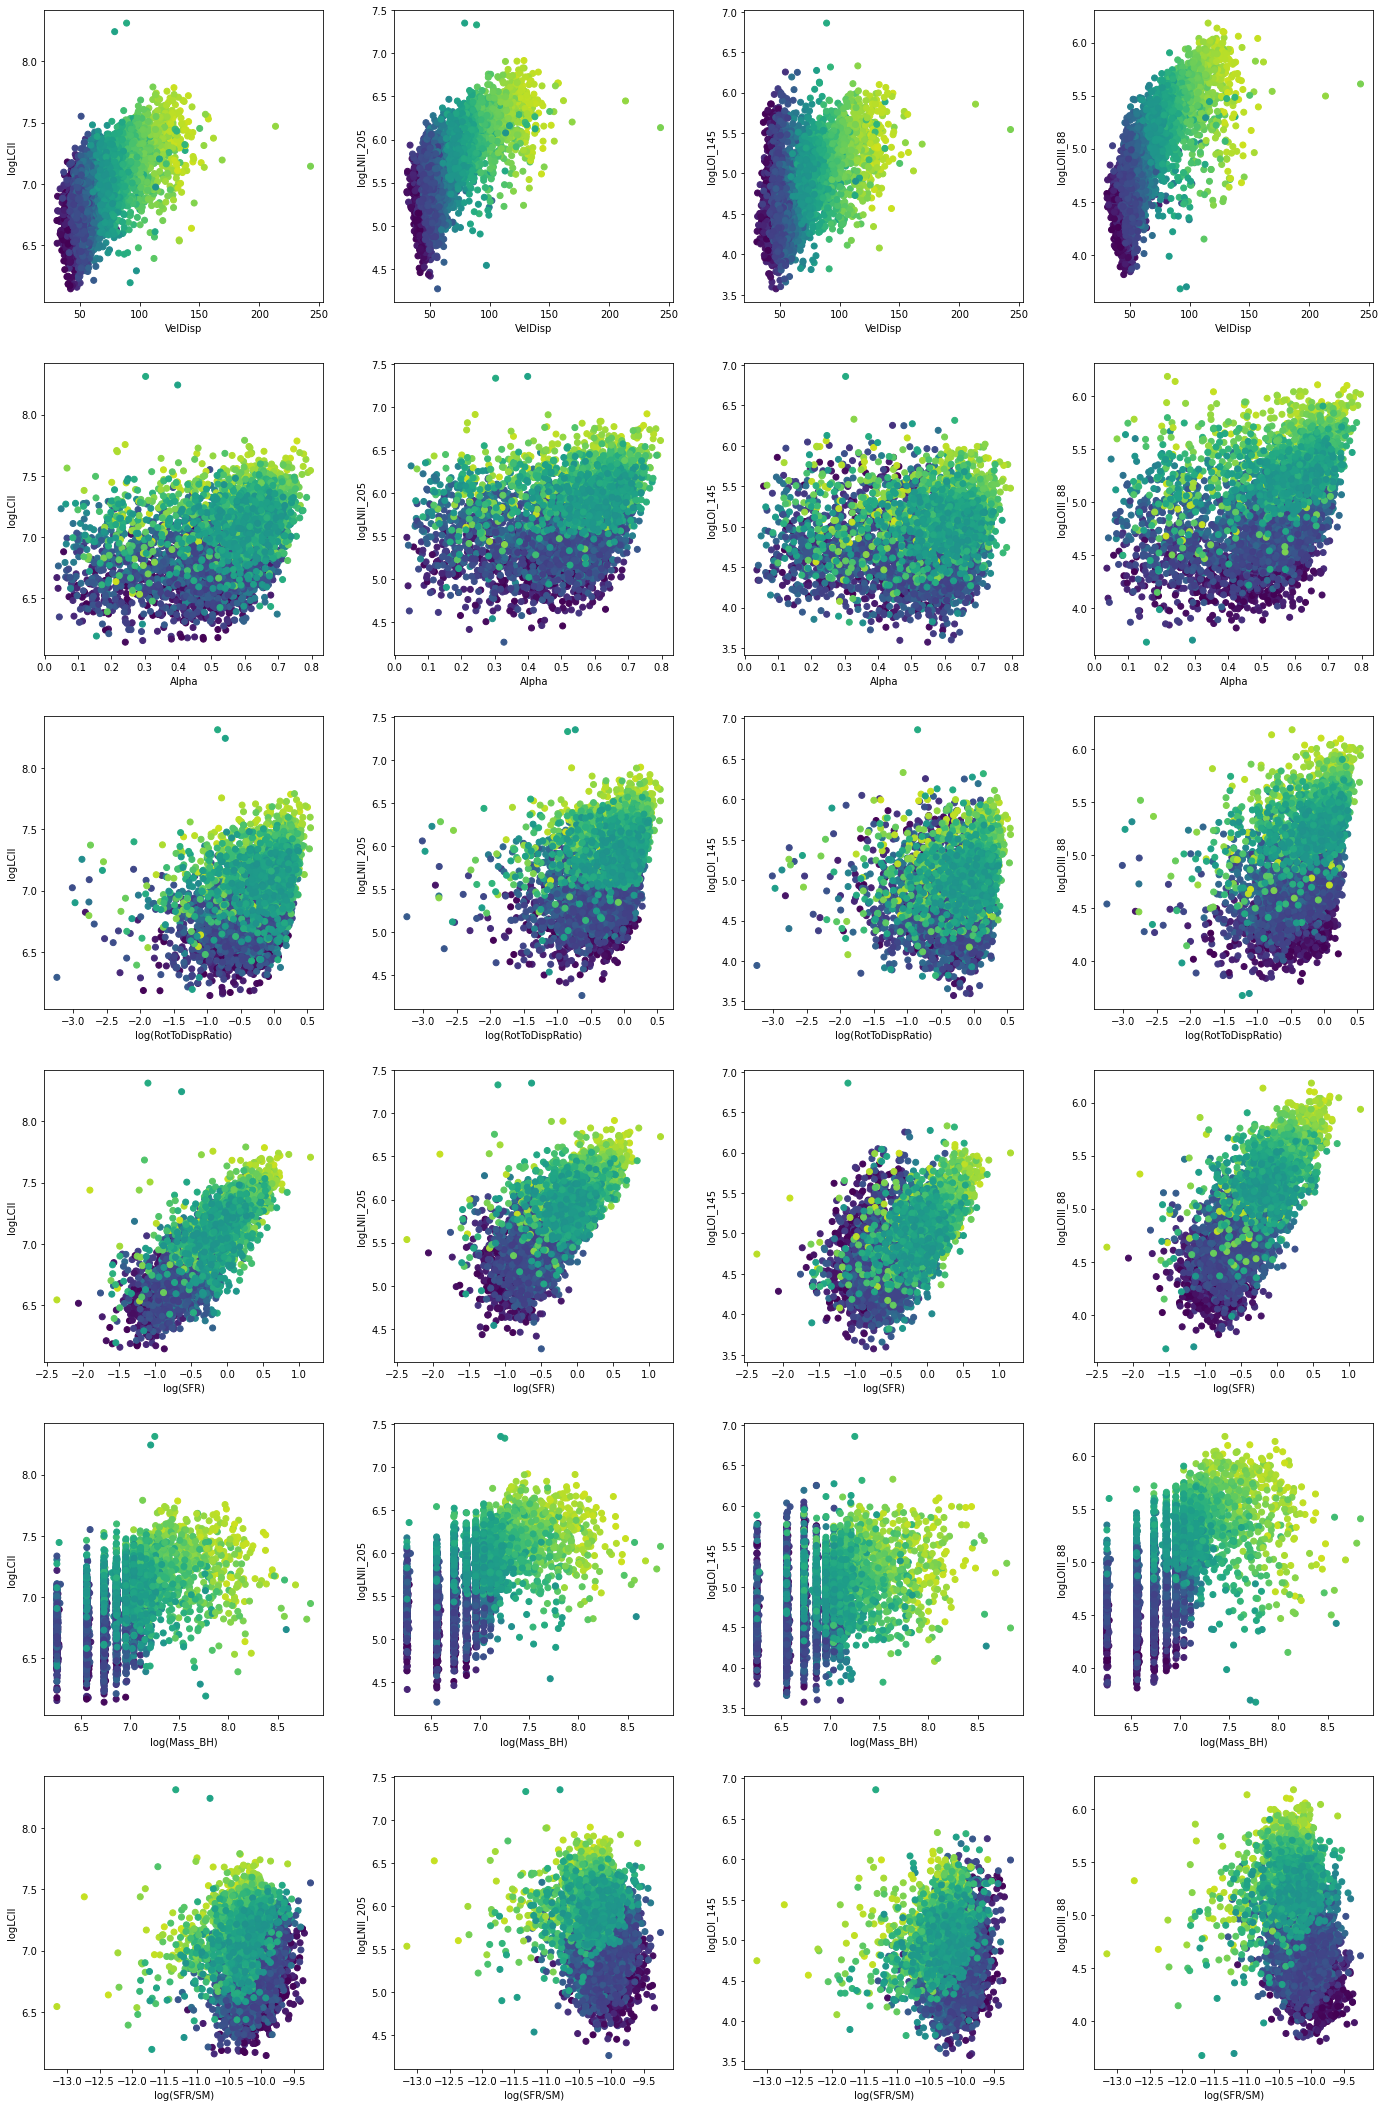

In [13]:
fig, ax = plt.subplots(6,4,figsize=(20,30), facecolor= 'white')
fig.tight_layout(pad=4)

for i_grp, grp in enumerate([grupo1, grupo2, grupo3]):
    for i_m,mparam in enumerate(mkparam0):
        for i,cparam in enumerate(colors):
            if i==i_m:
                for i_lp, lparam in enumerate(luparam): 
#                     ax[i_m,i_lp].scatter(mk_lu[mparam][grp],mk_lu[lparam][grp],color=cparam, marker=markers[i_grp])
                    ax[i_m,i_lp].scatter(mk_lu[mparam][grp],mk_lu[lparam][grp],
                                         c=mk_lu['logMStar'][grp], vmin=9, vmax=11, cmap='viridis')
                    ax[i_m,i_lp].set_xlabel(mparam)
                    ax[i_m,i_lp].set_ylabel(lparam)



    for i_m, mparam in enumerate(mkparam, start=2):
        for i,cparam in enumerate(colors):
            if i==i_m:
                for i_lp, lparam in enumerate(luparam): 
#                     ax[i_m,i_lp].scatter(np.log10(mk_lu[mparam][grp]),mk_lu[lparam][grp],color=cparam, marker=markers[i_grp])
                    ax[i_m,i_lp].scatter(np.log10(mk_lu[mparam][grp]),mk_lu[lparam][grp],
                                         c=mk_lu['logMStar'][grp], vmin=9, vmax=11, cmap='viridis')
                    ax[i_m,i_lp].set_xlabel("log("+mparam+")")
                    ax[i_m,i_lp].set_ylabel(lparam)


#         for i,cparam in enumerate(colors):
#             if i==i_m:
#                 for i_lp, lparam in enumerate(luparam): 
#                     ax[i_m,i_lp].scatter(np.log10(mk_lu['SFR'][grp]),mk_lu[lparam][grp],color=cparam,alpha=0.2*i_grp)
#                     ax[i_m,i_lp].set_xlabel("log(SFR)")
#                     ax[i_m,i_lp].set_ylabel(lparam  



In [14]:
os.chdir(r'../Analysis')
fig.savefig('ref.pdf')
fig.savefig('ref.jpg')

In [15]:
df = pd.DataFrame()
df['GalaxyID']=mk_lu['GalaxyID']
df['GalID']=mk_lu['GalID']
df['VelDisp']=mk_lu['VelDisp']
df['Alpha']=mk_lu['Alpha']
df['log(RotToDispRatio)']=np.log10(mk_lu['RotToDispRatio'])
df['log(SFR/SM)']=np.log10(mk_lu['SFR/SM'])
df['log(SFR)']=np.log10(mk_lu['SFR'])
df['log(Mass_BH)']=np.log10(mk_lu['Mass_BH'])
df['logLCII']=mk_lu['logLCII']
df['logLNII_205']=mk_lu['logLNII_205']
df['logLOI_145']=mk_lu['logLOI_145']
df['logLOIII_88']=mk_lu['logLOIII_88']

df[grupo1].corr(method='spearman')

<ipython-input-15-11727c97db7c>:9: RuntimeWarning: divide by zero encountered in log10
  df['log(Mass_BH)']=np.log10(mk_lu['Mass_BH'])


,GalaxyID,GalID,VelDisp,Alpha,log(RotToDispRatio),log(SFR/SM),log(SFR),log(Mass_BH),logLCII,logLNII_205,logLOI_145,logLOIII_88
GalaxyID,1.000000,0.039743,0.117342,-0.033997,-0.119011,-0.196300,-0.173355,0.026435,-0.252886,-0.143648,-0.115170,-0.067857
GalID,0.039743,1.000000,-0.482830,0.273953,0.331079,-0.137742,-0.263952,-0.300091,-0.166572,0.009499,-0.321859,-0.015310
VelDisp,0.117342,-0.482830,1.000000,-0.032901,-0.140444,-0.113629,0.113994,0.178236,0.008855,-0.106751,0.095486,-0.026292
Alpha,-0.033997,0.273953,-0.032901,1.000000,0.713248,0.061775,0.093423,-0.194390,0.179030,0.100218,-0.249358,0.192442
log(RotToDispRatio),-0.119011,0.331079,-0.140444,0.713248,1.000000,0.261096,0.246756,-0.200988,0.320479,0.274798,-0.264987,0.327512
log(SFR/SM),-0.196300,-0.137742,-0.113629,0.061775,0.261096,1.000000,0.907676,0.049056,0.524664,0.118493,0.137541,-0.047991
log(SFR),-0.173355,-0.263952,0.113994,0.093423,0.246756,0.907676,1.000000,0.107333,0.605153,0.227291,0.135166,0.132694
log(Mass_BH),0.026435,-0.300091,0.178236,-0.194390,-0.200988,0.049056,0.107333,1.000000,0.077931,0.046805,0.082603,0.066937
logLCII,-0.252886,-0.166572,0.008855,0.179030,0.320479,0.524664,0.605153,0.077931,1.000000,0.427023,0.498085,0.285962
logLNII_205,-0.143648,0.009499,-0.106751,0.100218,0.274798,0.118493,0.227291,0.046805,0.427023,1.000000,-0.083599,0.822651


In [16]:
df[grupo2].corr(method='spearman')

,GalaxyID,GalID,VelDisp,Alpha,log(RotToDispRatio),log(SFR/SM),log(SFR),log(Mass_BH),logLCII,logLNII_205,logLOI_145,logLOIII_88
GalaxyID,1.000000,0.930159,-0.622478,0.066109,0.049630,-0.120311,-0.509443,-0.377461,-0.426531,-0.286350,-0.355534,-0.354181
GalID,0.930159,1.000000,-0.677563,0.079724,0.083778,-0.127662,-0.549507,-0.413797,-0.447569,-0.290652,-0.390011,-0.359611
VelDisp,-0.622478,-0.677563,1.000000,0.142045,0.084824,-0.168667,0.421243,0.311355,0.325792,0.306178,0.224170,0.460025
Alpha,0.066109,0.079724,0.142045,1.000000,0.770688,0.052944,0.180159,-0.112481,0.263094,0.184371,-0.076630,0.321899
log(RotToDispRatio),0.049630,0.083778,0.084824,0.770688,1.000000,0.196885,0.270237,-0.116923,0.329457,0.307202,-0.036059,0.407449
log(SFR/SM),-0.120311,-0.127662,-0.168667,0.052944,0.196885,1.000000,0.738531,0.023159,0.446497,0.172805,0.213607,0.009745
log(SFR),-0.509443,-0.549507,0.421243,0.180159,0.270237,0.738531,1.000000,0.238675,0.667057,0.457517,0.363234,0.432797
log(Mass_BH),-0.377461,-0.413797,0.311355,-0.112481,-0.116923,0.023159,0.238675,1.000000,0.203169,0.208826,0.088899,0.258320
logLCII,-0.426531,-0.447569,0.325792,0.263094,0.329457,0.446497,0.667057,0.203169,1.000000,0.617142,0.555555,0.504251
logLNII_205,-0.286350,-0.290652,0.306178,0.184371,0.307202,0.172805,0.457517,0.208826,0.617142,1.000000,0.310858,0.831716


In [17]:
df[grupo3].corr(method='spearman')

,GalaxyID,GalID,VelDisp,Alpha,log(RotToDispRatio),log(SFR/SM),log(SFR),log(Mass_BH),logLCII,logLNII_205,logLOI_145,logLOIII_88
GalaxyID,1.000000,-0.356054,0.419819,-0.098199,-0.089530,-0.192466,0.077434,0.410553,0.128169,0.173878,0.113801,0.141885
GalID,-0.356054,1.000000,-0.852244,0.194452,0.150904,0.163925,-0.370199,-0.762798,-0.390692,-0.355361,-0.354062,-0.295068
VelDisp,0.419819,-0.852244,1.000000,-0.071709,-0.015506,-0.300133,0.335104,0.759215,0.379108,0.452289,0.370221,0.433692
Alpha,-0.098199,0.194452,-0.071709,1.000000,0.769902,0.313905,0.334738,-0.293750,0.220562,0.229251,0.151898,0.385049
log(RotToDispRatio),-0.089530,0.150904,-0.015506,0.769902,1.000000,0.317947,0.363105,-0.303322,0.286499,0.310476,0.246486,0.440340
log(SFR/SM),-0.192466,0.163925,-0.300133,0.313905,0.317947,1.000000,0.715909,-0.422466,0.339879,0.098853,0.308344,0.125818
log(SFR),0.077434,-0.370199,0.335104,0.334738,0.363105,0.715909,1.000000,0.093713,0.657685,0.501331,0.572792,0.554682
log(Mass_BH),0.410553,-0.762798,0.759215,-0.293750,-0.303322,-0.422466,0.093713,1.000000,0.188560,0.241700,0.136132,0.179383
logLCII,0.128169,-0.390692,0.379108,0.220562,0.286499,0.339879,0.657685,0.188560,1.000000,0.814619,0.620051,0.682367
logLNII_205,0.173878,-0.355361,0.452289,0.229251,0.310476,0.098853,0.501331,0.241700,0.814619,1.000000,0.511315,0.835697


In [18]:
reg = RandomForestRegressor(max_depth=2000, random_state=42, n_estimators=1000)
reg.fit(df[['logLCII','logLNII_205','logLOI_145','logLOIII_88']],df['VelDisp'])

RandomForestRegressor(max_depth=2000, n_estimators=1000, random_state=42)

In [19]:
y_pred =reg.predict(df[['logLCII','logLNII_205','logLOI_145','logLOIII_88']])

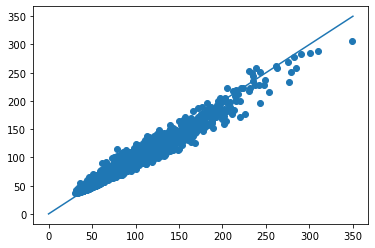

In [20]:
plt.scatter(df['VelDisp'], y_pred)
plt.plot([0,350],[0,350])